In [1]:
import matplotlib.pylab as plt

import cv2
import numpy as np
import imutils

(3000, 4000, 3)

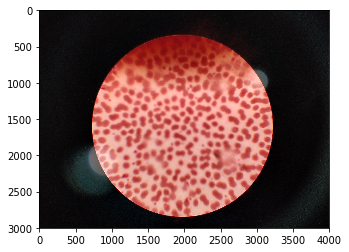

In [2]:
image = cv2.imread('0015.png')
plt.imshow(image)
image.shape

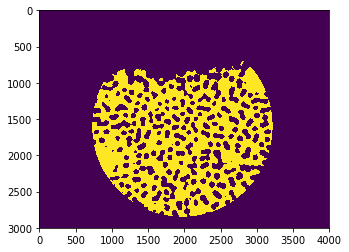

In [7]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.normalize(gray, gray, 0, 1.0, cv2.NORM_MINMAX)
#ret,thresh = cv2.threshold(gray, 5, 255, cv2.THRESH_BINARY)

plt.imshow(gray)
#plt.show()
#plt.imshow(thresh)

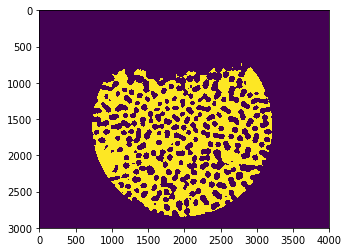

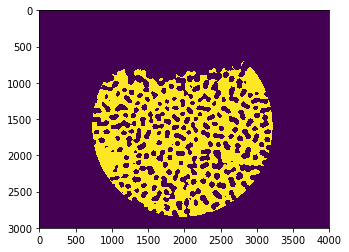

In [9]:
thresh_erode = cv2.erode(gray, None, iterations=2)
thresh_dilate = cv2.dilate(thresh_erode, None, iterations=2)

plt.imshow(thresh_erode)
plt.show()
plt.imshow(thresh_dilate)

In [22]:
ik = thresh_dilate*image

plt.imshow(ik)

ValueError: operands could not be broadcast together with shapes (3000,4000) (3000,4000,3) 

In [10]:
cnts = cv2.findContours(thresh_dilate.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
c = max(cnts, key=cv2.contourArea)

In [11]:
extLeft = tuple(c[c[:, :, 0].argmin()][0])
extRight = tuple(c[c[:, :, 0].argmax()][0])
extTop = tuple(c[c[:, :, 1].argmin()][0])
extBot = tuple(c[c[:, :, 1].argmax()][0])

print(extLeft,extRight,extTop,extBot)

(732, 1574) (3221, 1633) (2915, 786) (1936, 2844)


In [12]:
draw = cv2.drawContours(image, [c], -1, (0, 255, 255), 2)
cv2.circle(image, extLeft, 50, (0, 0, 255), -1)
cv2.circle(image, extRight, 50, (0, 255, 0), -1)
cv2.circle(image, extTop, 50, (255, 0, 0), -1)
cv2.circle(image, extBot, 50, (255, 255, 0), -1)

array([[[ 9,  8, 10],
        [ 8,  7,  9],
        [10,  9, 11],
        ...,
        [12,  9, 11],
        [13, 10, 12],
        [14, 11, 13]],

       [[ 9,  8, 10],
        [ 9,  8, 10],
        [10,  9, 11],
        ...,
        [13, 10, 12],
        [15, 12, 14],
        [15, 12, 14]],

       [[10,  7,  9],
        [11,  8, 10],
        [12,  9, 11],
        ...,
        [16, 13, 15],
        [22, 19, 21],
        [23, 20, 22]],

       ...,

       [[12,  9, 11],
        [12,  9, 11],
        [11,  8, 10],
        ...,
        [ 3,  3,  3],
        [ 6,  6,  6],
        [ 5,  5,  5]],

       [[12,  9, 11],
        [11,  8, 10],
        [10,  7,  9],
        ...,
        [ 3,  3,  3],
        [ 3,  3,  3],
        [ 3,  3,  3]],

       [[11,  8, 10],
        [ 9,  6,  8],
        [10,  7,  9],
        ...,
        [ 5,  5,  5],
        [ 4,  4,  4],
        [ 5,  5,  5]]], dtype=uint8)

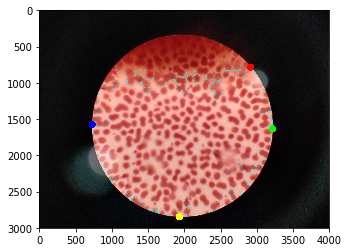

In [13]:
plt.imshow(draw)

In [14]:
bounds_t = int(extTop[0])-1
bounds_b = int(extBot[0])+1
bounds_l = int(extLeft[1])-1
bounds_r = int(extRight[1])+1

print(bounds_t,bounds_b,bounds_l,bounds_r)

2914 1937 1573 1634


In [15]:
max_width = max(bounds_l,bounds_r)
max(bounds_l,bounds_r)

1634

In [16]:
max_height = max(bounds_t,bounds_b)
max(bounds_t,bounds_b)

2914

In [17]:
import math

In [18]:
width = round(math.sqrt((extRight[0]-extLeft[0])**2 + (extRight[1]-extLeft[1])**2))+1
height = round(math.sqrt((extBot[0]-extTop[0])**2 + (extBot[1]-extTop[1])**2))+1

diameter = min(width,height)
radius = int(diameter / 2)

radius

1140

In [19]:
x_center = int(extLeft[0] + radius)
y_center = int(extTop[1] + radius)

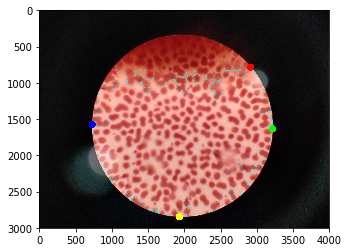

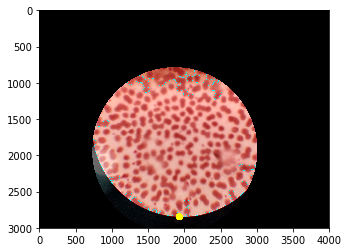

In [20]:
#mask = cv2.getRectSubPix(image, (width,height), (x_center,y_center), 3)
image1 = np.zeros((image.shape[0],image.shape[1],3),np.uint8)
cv2.circle(image1,(x_center,y_center),radius,(255,255,255),-1,8,0)
cv2.normalize(image1, image1, 0, 1.0, cv2.NORM_MINMAX)
mask = image*image1

plt.imshow(image)
plt.show()
plt.imshow(mask)

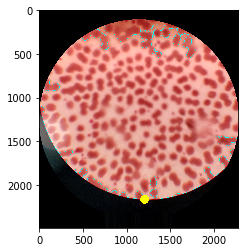

In [21]:
square = cv2.getRectSubPix(mask, (height,width), (x_center,y_center), 3)

plt.imshow(square)

In [ ]:
resize = cv2.resize(square,(1024,1024), interpolation = cv2.INTER_CUBIC)

plt.imshow(resize)
resize.shape

In [ ]:
x_c = int(width / 2)
y_c = int(height / 2)
#ig = cv2.drawContours(mask, (x_c,y_c), radius, (255, 255, 0), 3)

#plt.imshow(ig)
x_c,y_c

In [ ]:
maskGray = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

plt.imshow(maskGray)

In [ ]:
ret,img = cv2.threshold(maskGray, 45, 255, cv2.THRESH_OTSU)

plt.imshow(img)

In [ ]:
adaptive = cv2.adaptiveThreshold(img, 101, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,145,2)

plt.imshow(adaptive)

In [ ]:
if not(ig.all()):
    mask = cv2.bitwise_not(mask)

plt.imshow(mask)

In [ ]:
adaptive = cv2.adaptiveThreshold(img, 101, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,145,2)

plt.imshow(adaptive)